# 3 - Introduction to Statistics: Error, error bars, and timeseries

First, let's import the libraries and data we'll need:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from IPython.display import display

NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';')

## 1. Error
Measures of error help us understand how accurate our predictions are. 

### Relative error, absolute error, mean absolute error (MAE)
The simplest measure of error is to look at how far from the data our predictions are. Let's start by fitting a correlation in the NBA 2021 datset with a linear regression. We can consider the correlation between 2-Point Attempts (2PA) and 2-Pointers (2P) made

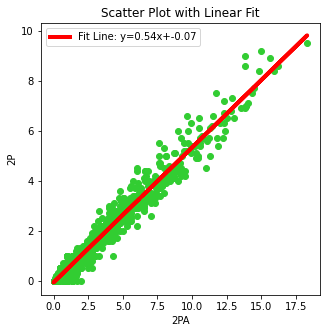

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "2PA"
dependent_variable = "2P"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

axs.set_title('%s vs 2-Point Attempts' %dependent_variable)
axs.set_xlabel("2-Point Attempts")
axs.set_ylabel(dependent_variable)

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], 1)  # degree 1 polynomial = line
fit_line = np.poly1d(coefficients)

# Generate y-values for the fit line
y_fit = fit_line(NBA_regular_2021[independent_variable])

# Plot the linear fit line
plt.plot(NBA_regular_2021[independent_variable], y_fit, label=f'Fit Line: y={coefficients[0]:.2f}x+{coefficients[1]:.2f}', color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Show the plot
plt.show()

Now that we have the linear fit (inside the variable `y_fit`), we can compare it with the actual data. We can find the relative error in one line

In [36]:
Actual_data = NBA_regular_2021[dependent_variable]
Modeled_data = y_fit
Relative_error = Actual_data - Modeled_data
Absolute_error = np.abs(Actual_data - Modeled_data)

6.469920384884533e-16 -1.3746988582127173 1.6124926164258024


### 🔍 EXERCISE 1: What can you say about the relative error in the relationship between two-pointers made and two-pointers attempted?

- What is the min and max relative error?
- What is the mean relative error? Why is not a great measure of the spread?

### 🔍 EXERCISE 2: What other errors can you calculate using the relative error?

- What is the absolute error?
- What is the mean absolute error (MAE)? How does it compare to the mean relative error from above?
- What is the percent error? 
- What is the mean percent error? Is it small or large? What does this say about the relationship between two-pointers made and two-pointers attempted?

### Mean square error (MSE) and root mean square error (RMS)
The mean square error (MSE) and root mean square (RMS) error give us a slightly better idea of the distance of each point from the prediction. Recall that we are currently only measuring the error in the two-pointers made (as a function of two-pointers attempted). These take the following functional forms

#### MSE


We can calculate the MSE and RMS errors using the `mean_squared_error` function from the `sci_kit_learn` library

In [40]:
MSE = mean_squared_error(Actual_data, Modeled_data)
print(MSE)

0.1306396285271756


### 🔍 EXERCISE 3: Calculate the RMS error from the MSE. What can you say about it? Is it large or small, relative to the typical values of the two-pointers made?

## 2. Error bars

### Scatter plots

To show errorbars in our scatter plots, we must first consider a trend between two variables and fit the trend. Let's consider field goal percentage (FG%) as a function of minutes played (MP). This trend is well fit by a second-degree polynomial (`deg=2` in `numpy`'s `poylfit`)

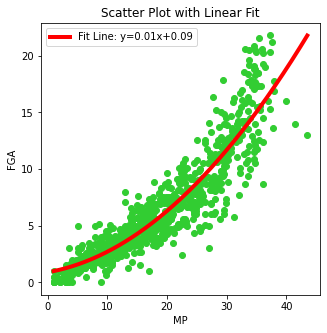

In [82]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Plot positive correlation - 
independent_variable = "MP"
dependent_variable = "FGA"

axs.scatter(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], color='limegreen')

axs.set_title('%s vs 2-Point Attempts' %dependent_variable)
axs.set_xlabel("2-Point Attempts")
axs.set_ylabel(dependent_variable)

# Calculate the linear fit (least squares)
coefficients = np.polyfit(NBA_regular_2021[independent_variable], NBA_regular_2021[dependent_variable], deg=2)  # degree 1 polynomial = line
fit_line = np.poly1d(coefficients)
x_fit = np.linspace(np.min(NBA_regular_2021[independent_variable]), np.max(NBA_regular_2021[independent_variable]), 500)

# Generate y-values for the fit line
y_fit = fit_line(x_fit)

# Plot the linear fit line
plt.plot(x_fit, y_fit, label=f'Fit Line: y={coefficients[0]:.2f}x+{coefficients[1]:.2f}', color='red', linewidth=4)

# Add labels and title
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Scatter Plot with Linear Fit')
plt.legend()

# Show the plot
plt.show()

Now, we can find the relative absolute error for each player

In [76]:
Actual_data = NBA_regular_2021[dependent_variable]
Modeled_data = fit_line(NBA_regular_2021[independent_variable])

Relative_absolute_error = np.abs(Actual_data - Modeled_data)

Now, let's visualize the relationship between field goal attempts and minutes played for a few players

4.406704766906234
5.015956225339831
5.131287661757202
0.11395228493159593


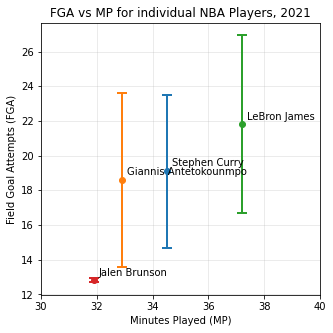

In [108]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

Players_to_consider = ['Stephen Curry', 'Giannis Antetokounmpo', 'LeBron James', 'Jalen Brunson']

for player in Players_to_consider:
    FGA = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player]['FGA']
    MP = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player]['MP']
    i = NBA_regular_2021.loc[NBA_regular_2021['Player'] == player].index.values.astype(int)[0]
    relerr = np.asarray(Relative_absolute_error)[i]
    print(relerr)
    plt.errorbar(MP, FGA, yerr=relerr, fmt='o', capsize=5, elinewidth=2, capthick=2)
    plt.annotate(player, xy=(MP, FGA), xytext=(5,5), textcoords='offset points')
#plt.plot(x_fit, y_fit, color='red', linewidth=4)
axs.set_xlim([30,40])
axs.set_xlabel("Minutes Played (MP)")
axs.set_ylabel("Field Goal Attempts (FGA)")
axs.set_title("FGA vs MP for individual NBA Players, 2021")
plt.grid(True, alpha=0.3)

### 🔍 EXERCISE 4: Create a scatter plot with error bars for the relationship between personal fouls (PF) and minutes played (MP). Try to answer the following questions:
- What kind of trend do you think best fits PF as a function of MP?
- Find a fit to this trend
- Find the relative absolute error between your fit and the actual data
- Show PF vs MP for 5 different players, show errorbars for the fit

### Bar graphs

In order to show error bars in a bar graph, let's think of different categories that exist in our dataset. The most obvious one is teams, so let's try to visualize some data for 3 teams, and understand the error in that data using error bars.

First, let's see which teams are available. You can find all of the unique entries in a list using the pyhon `set` function

In [17]:
print(set(NBA_regular_2021['Tm']))

{'IND', 'ATL', 'BRK', 'SAC', 'POR', 'DEN', 'MIN', 'MEM', 'NOP', 'GSW', 'CLE', 'SAS', 'OKC', 'CHO', 'DAL', 'MIL', 'BOS', 'WAS', 'UTA', 'TOT', 'DET', 'LAL', 'PHO', 'TOR', 'NYK', 'ORL', 'MIA', 'PHI', 'CHI', 'HOU', 'LAC'}


In [21]:
#make a list of the 3 teams you want to consider
Teams_to_consider = ["NYK", "BRK", "PHI"] #Knicks, Nets, and 76ers

First_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "NYK"]
Second_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "BRK"]
Third_team_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Tm'] == "PHI"]

#Let's collect all of these dataframes in an array of dataframes so they are easy to call back later
Data_by_team_2021 = [First_team_data_2021, Second_team_data_2021, Third_team_data_2021]

#Next, choose a stat to consider
Stat_to_consider = "FG%" #field goal percentage

Now that we've selected the teams and stat we want to consider, let's find some useful statistical quantities for this stat. Let's find:
- The average FG%
- The standard deviation in FG%
- The RMS error in FG%

In [28]:
#Let's make empty arrays in which to store the averages and standard deviations
Averages_2021 = []
StDevs_2021 = []

print("Stats for %s" %Stat_to_consider)
for i in range(0, 3):
    Current_df = Data_by_team_2021[i]
    Current_average = np.mean(Current_df[Stat_to_consider])
    Current_stdev = Current_df[Stat_to_consider].std()
    
    #store these quantities in the empty arrays
    Averages_2021.append(Current_average)
    StDevs_2021.append(Current_stdev)
    
    #print some information
    print("Team: %s --- Average: %1.3f --- Standard Deviation: %1.3f" %(Teams_to_consider[i], Current_average, Current_stdev))
    
#Let's first find the average and RMS error
#First_team_avg_FGpct = np.mean(First_team_data_2021['FG%'])
#First_team_StDev_FGpct = First_team_data_2021.std()

#Let's first find the average and RMS error
#Second_team_avg_FGpct = np.mean(First_team_data_2021['FG%'])
#First_team_StDev_FGpct = First_team_data_2021.std()

#Let's first find the average and RMS error
#First_team_avg_FGpct = np.mean(First_team_data_2021['FG%'])
#First_team_StDev_FGpct = First_team_data_2021.std()


Stats for FG%
Team: NYK --- Average: 0.377 --- Standard Deviation: 0.210
Team: BRK --- Average: 0.435 --- Standard Deviation: 0.133
Team: PHI --- Average: 0.447 --- Standard Deviation: 0.183


Text(0.5, 1.0, 'Average FG% for 3 teams during the regular 2021 season')

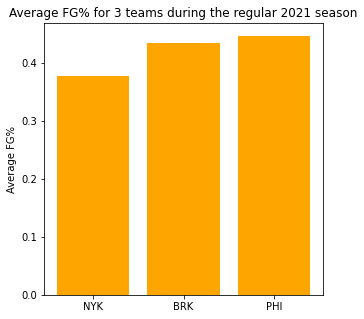

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
plt.bar(Teams_to_consider, Averages_2021, color='orange')

#plt.xlabel(independent_variable)
plt.ylabel("Average FG%")
plt.title("Average FG% for 3 teams during the regular 2021 season")

Let's add errorbars to this graph. We will use the standard deviation to give us a sense of the error in the data

Text(0.5, 1.0, 'Average FG% for 3 teams during the regular 2021 season')

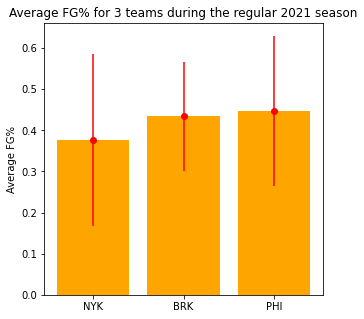

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
plt.bar(Teams_to_consider, Averages_2021, color='orange')
plt.errorbar(Teams_to_consider, Averages_2021, yerr=StDevs_2021, color='red', fmt="o")

#plt.xlabel(independent_variable)
plt.ylabel("Average FG%")
plt.title("Average FG% for 3 teams during the regular 2021 season")

### 🔍 EXERCISE 5: Using functions and libraries we've used in the past, find the RMS error in the FG%. Plot the average FG% for 4 different teams, with errorbars showing the RMS error. 

## 3. Timeseries

We have NBA regular and post-season data for 3 seasons. Let's pull in all of the data we have for these seasons.

In [3]:
NBA_regular_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2021 = pd.read_csv('../Data/NBA_2021-2022_stats_Playoffs.csv', engine='python', delimiter=';')

NBA_regular_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2022 = pd.read_csv('../Data/NBA_2022-2023_stats_Playoffs.csv', engine='python', delimiter=';')

NBA_regular_2023 = pd.read_csv('../Data/NBA_2023-2024_stats_Regular.csv', engine='python', delimiter=';')
NBA_playoff_2023 = pd.read_csv('../Data/NBA_2023-2024_stats_Playoffs.csv', engine='python', delimiter=';')

As an example of some of the things we can do with timeseries analysis, let's focus on an individual player and track their stats across 3 seasons. I picked a player at random, but you can pick any other player!

In [151]:
#make a string with the player name you're interested in
#Player = "Karl-Anthony Towns"
Players_to_consider = ["LeBron James", "Karl-Anthony Towns"]
#Colors_to_use = ""

Player_data_all_years=[]
counter=0
for Player in Players_to_consider:
    #check if the player played in all 3 seasons
    if(Player in np.asarray(NBA_regular_2021['Player']) and Player in np.array(NBA_regular_2022['Player']) and Player in np.array(NBA_regular_2023['Player'])):
        print("%s played in all 3 regular seasons (2021-2023)" %Player)
    else: 
        print("Player did not play in all seasons")

    Player_data_2021 = NBA_regular_2021.loc[NBA_regular_2021['Player'] == Player]
    Player_data_2022 = NBA_regular_2022.loc[NBA_regular_2022['Player'] == Player]
    Player_data_2023 = NBA_regular_2023.loc[NBA_regular_2023['Player'] == Player]

    #let's add the year to each of these datasets - with pandas dataframes, you can add a new column using the
    #.assign() function
    Player_data_2021=Player_data_2021.assign(Year=[2021])
    Player_data_2022=Player_data_2022.assign(Year=[2022])
    Player_data_2023=Player_data_2023.assign(Year=[2023])

    #Let's combine all three datasets into one and display it
    Player_data_all_years.append(pd.concat([Player_data_2021, Player_data_2022, Player_data_2023]))
    display(Player_data_all_years[counter])
    counter+=1

#print(Player_data_2021['Year'])

LeBron James played in all 3 regular seasons (2021-2023)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
368,274,LeBron James,SF,37,LAL,56,56,37.2,11.4,21.8,...,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3,2021
306,239,LeBron James,PF,38,LAL,55,54,35.5,11.1,22.2,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,2022
325,250,LeBron James,PF,39,LAL,71,71,35.3,9.6,17.9,...,0.9,6.4,7.3,8.3,1.3,0.5,3.5,1.1,25.7,2023


Karl-Anthony Towns played in all 3 regular seasons (2021-2023)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
736,546,Karl-Anthony Towns,C,26,MIN,74,74,33.5,8.7,16.4,...,2.6,7.2,9.8,3.6,1.0,1.1,3.1,3.6,24.6,2021
609,478,Karl-Anthony Towns,PF,27,MIN,29,29,33.0,7.3,14.8,...,1.7,6.5,8.1,4.8,0.7,0.6,3.0,3.8,20.8,2022
651,506,Karl-Anthony Towns,PF,28,MIN,62,62,32.7,7.7,15.3,...,1.5,6.8,8.3,3.0,0.7,0.7,2.9,3.3,21.8,2023


Let's plot this player's stats (there are 25 of them) across the 3 regular seasons

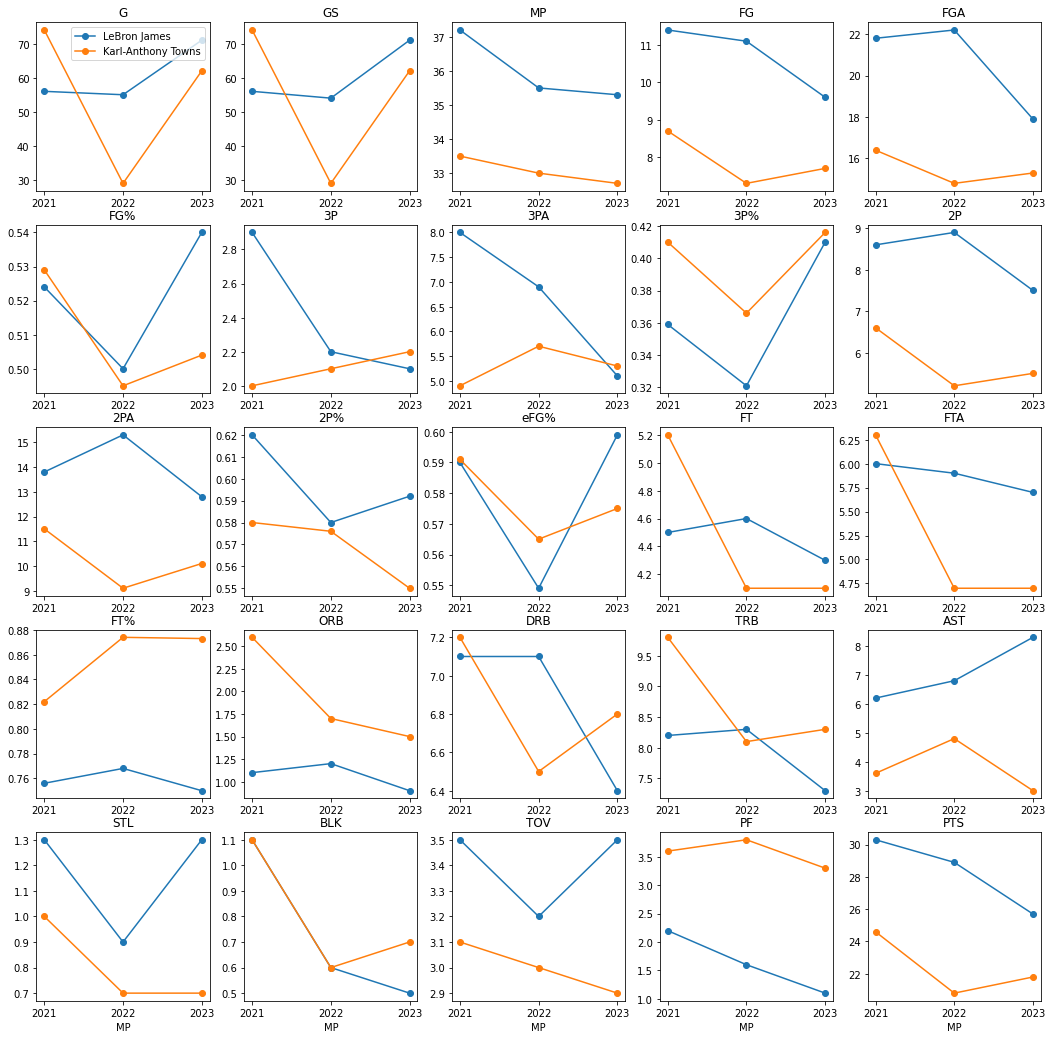

In [160]:
fig, axs = plt.subplots(5, 5, figsize=(18, 18))

Stat_to_consider = "MP"

independent_var="MP"
for p in range(0, len(Players_to_consider)):
    free_index=5
    for i in range(0, 5):
        for j in range(0, 5):
            dependent_variable = "%s"%Player_data_all_years[p].columns[free_index]
            axs[i][j].plot(Player_data_all_years[p]['Year'], Player_data_all_years[p][dependent_variable], marker='o', label=Players_to_consider[p])
            axs[i][j].set_title(dependent_variable)
            axs[i][j].set_xticks([2021, 2022, 2023])
            free_index+=1
            if(i==4):
                axs[i][j].set_xlabel(independent_var)
axs[0][0].legend()    
#axs.scatter(Player_data_all_years['Year'], Player_data_all_years[Stat_to_consider])


Which of these looks like it may be trending? Let's consider LeBron's free throw attempts (FTA) and points scored (PTS) and fit these with a linear trend

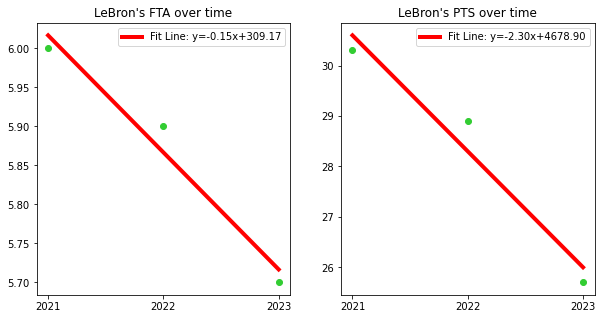

In [177]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot positive correlation - 
independent_variable = "Year"
dependent_variable = "FTA"

dependent_variables_to_consider=['FTA', 'PTS']

#Make empty arrays in which to store out results
Coefficients_FGA_and_PTS = []

counter=0
for dependent_variable in dependent_variables_to_consider:
    axs[counter].scatter(Player_data_all_years[0]['Year'], Player_data_all_years[0][dependent_variable], color='limegreen')
    #axs.scatter(Player_data_all_years[0][independent_variable], Player_data_all_years[0]['PTS'], color='purple')

    axs[counter].set_title("LeBron's %s over time" %dependent_variable)
    axs[counter].set_xticks([2021,2022,2023])

    # Calculate the linear fit (least squares)
    coefficients = np.polyfit(Player_data_all_years[0][independent_variable], Player_data_all_years[0][dependent_variable], deg=1)  # degree 1 polynomial = line
    Coefficients_FGA_and_PTS.append(coefficients)
    
    fit_line = np.poly1d(coefficients)
    #x_fit = np.linspace(np.min(NBA_regular_2021[independent_variable]), np.max(NBA_regular_2021[independent_variable]), 500)
    x_fit = Player_data_all_years[0]['Year']
    # Generate y-values for the fit line
    y_fit = fit_line(x_fit)

    # Plot the linear fit line
    axs[counter].plot(x_fit, y_fit, label=f'Fit Line: y={coefficients[0]:.2f}x+{coefficients[1]:.2f}', color='red', linewidth=4)
    axs[counter].legend()
    counter +=1
# Add labels and title


# Show the plot
plt.show()

Because we have the equation for each line, we can predict what LeBron's FTA and PTS would be in the 2024-2025 season using our linear model. Let's calculate what it would be for 2024. 

Remember that when making predictions, it is crucial to have some understanding in the error of your model. One quick estimate we could use is the standard deviation, so let's calculate that for each stat too.

In [181]:
StdDev_FGA = Player_data_all_years[0]['FGA'].std()
StdDev_PTS = Player_data_all_years[0]['PTS'].std()

Prediction_year = 2024

FGA_prediction_2024 = Coefficients_FGA_and_PTS[0][0]*Prediction_year + Coefficients_FGA_and_PTS[0][1]
PTS_prediction_2024 = Coefficients_FGA_and_PTS[1][0]*Prediction_year + Coefficients_FGA_and_PTS[1][1]

print("%d FGA Prediction: %1.3f   --- StdDev: %1.3f" %(Prediction_year, FGA_prediction_2024, StdDev_FGA))
print("%d PTS Prediction: %1.3f   --- StdDev: %1.3f" %(Prediction_year, PTS_prediction_2024, StdDev_PTS))

print(FGA_prediction_2024 - StdDev_FGA, FGA_prediction_2024 + StdDev_FGA)
print(PTS_prediction_2024 - StdDev_PTS, PTS_prediction_2024 + StdDev_PTS)

2024 FGA Prediction: 5.567   --- StdDev: 2.376
2024 PTS Prediction: 23.700   --- StdDev: 2.358
3.1910965596536944 7.942236773679518
21.34203477548768 26.05796522450832


Using these statistics and analysis we can now say something like:

#### If LeBron James' 3-year trend continues, our model predicts that he will likely make somewhere between 3.19 and 7.94 free-throw attempts per game in 2024 (with 68% confidence)

and

#### If LeBron James' 3-year trend continues, our model predicts that he will likely make somewhere between 21.34 and 26.01 points per game in 2024 (with 68% confidence)

In 2024 LeBron actually made 4.7 FTA and 24.4 PTS, so our model was actually pretty accurate! This is how we can use statistics to make predictions about things, but we must always try to understand the limitations of our models and the caveats (error). 

Of course, because we only considered a 3-year trend, the model is not as strong as it could be. The more data we incorporate, the more accurate and complex our model could be (so we can maybe consider something other than a linear trend).

### 🔍 EXERCISES: What other timeseries analyses can you think of doing with this data? Try to tackle one of the problems below:

#### Team Momentum Analysis
Consider the performance of a few different teams across the different seasons. For each team, calculate the averages, standard deviations, and different errors for different stats across players. How do these averages change across the seasons? Can you notice any trends for the team that won the NBA Championship? What about for the team in last place, and an average NBA team that did not make the playoffs?

#### Playoff Performance Prediction
Use regular season data to build models predicting player success, similar to the exercise above. Do the same thing using the playoff data and compare the results. Are the error and standard deviation similar for regular season and playoffs?

#### Change Point Detection:
Find when a player may have had significant performance shifts (either negative or positive) across the 3 
seasons. Do some background research for why that player may have experienced that shift in performance (aging, injuries, trade)?

#### Career Trajectory Modeling
Fit trend lines to several player's 3-season progression. Classify players into categories: improving, declining, plateauing, volatile. How certain can you be that each player you consider fits into these categories?